# Titanic Dataset - Data Cleaning & Exploratory Data Analysis (EDA)

Performing data cleaning and exploratory data analysis on the Titanic dataset.

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style('whitegrid')


In [5]:
df = pd.read_csv('C:\\Users\\Shouvik\\Downloads\\titanic\\train.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Dataset Overview
Let's explore the structure and summary of the Titanic dataset.

In [8]:
# Basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# Shape of the dataset (rows, columns)
print("\nShape:", df.shape)


Shape: (891, 12)


In [10]:
# Summary statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
# Missing values in each column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data Cleaning
We will handle missing values in `Age`, `Embarked`, and drop the `Cabin` column (too many (close to 75%) missing entries).

In [15]:
# Fill missing 'Age' with median
df.fillna({'Age': df['Age'].median()}, inplace=True)

In [17]:
# Fill missing 'Embarked' with mode
df.fillna(df['Embarked'].mode()[0], inplace=True)

In [18]:
# Drop 'Cabin' column
df.drop('Cabin', axis=1, inplace=True)

In [19]:
# Confirm missing values are handled
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Exploratory Data Analysis (EDA)
Let’s explore relationships and trends in the Titanic dataset.

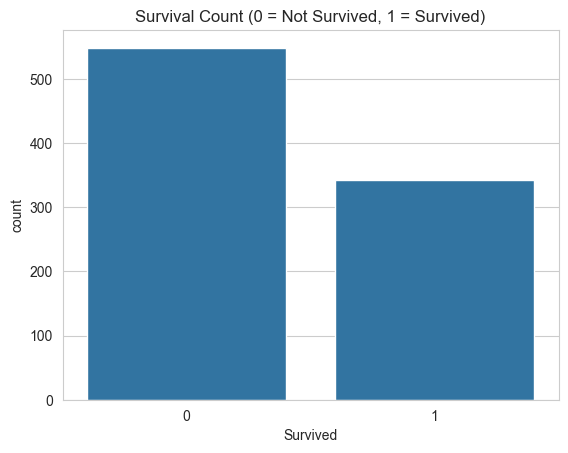

In [20]:
# Survival count
sns.countplot(x='Survived', data=df)
plt.title('Survival Count (0 = Not Survived, 1 = Survived)')
plt.show()

## Survival by Gender

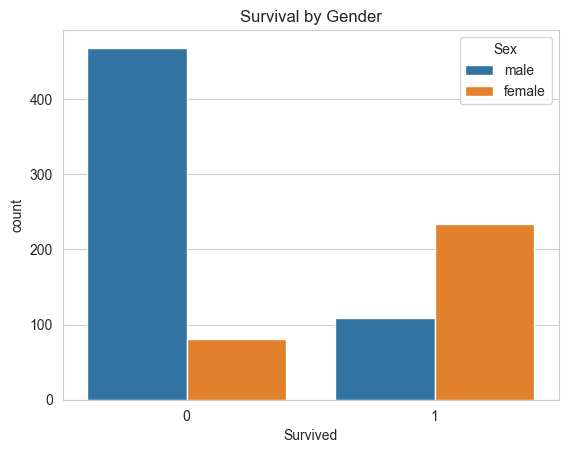

In [21]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival by Gender')
plt.show()

## Survival by Passenger Class

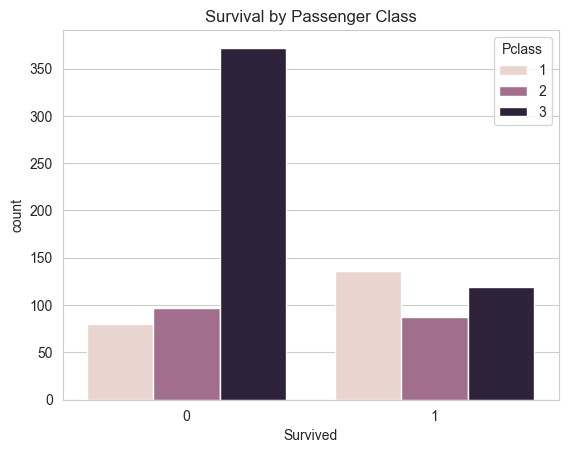

In [22]:
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival by Passenger Class')
plt.show()

## Age Distribution

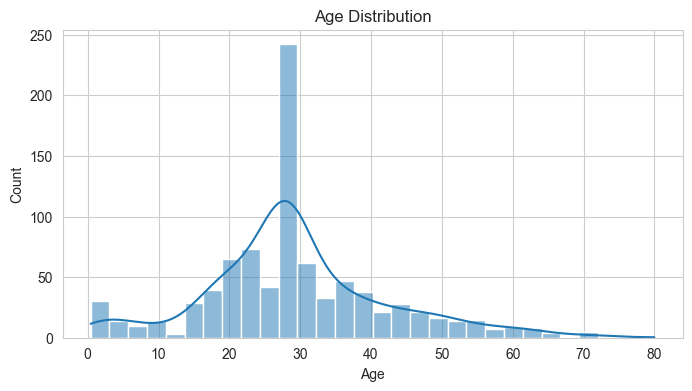

In [23]:
plt.figure(figsize=(8,4))
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

## Age vs Survival

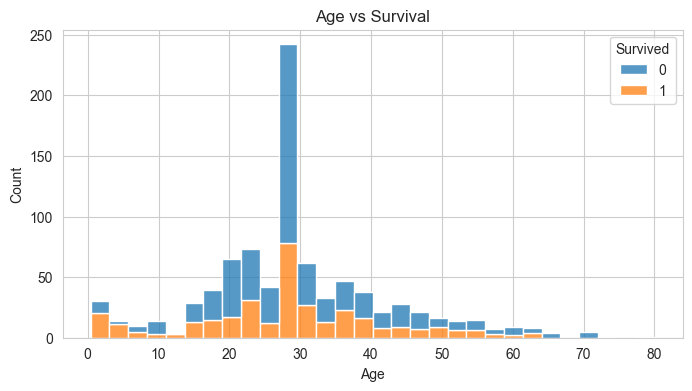

In [24]:
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack')
plt.title('Age vs Survival')
plt.show()

## Correlation Heatmap

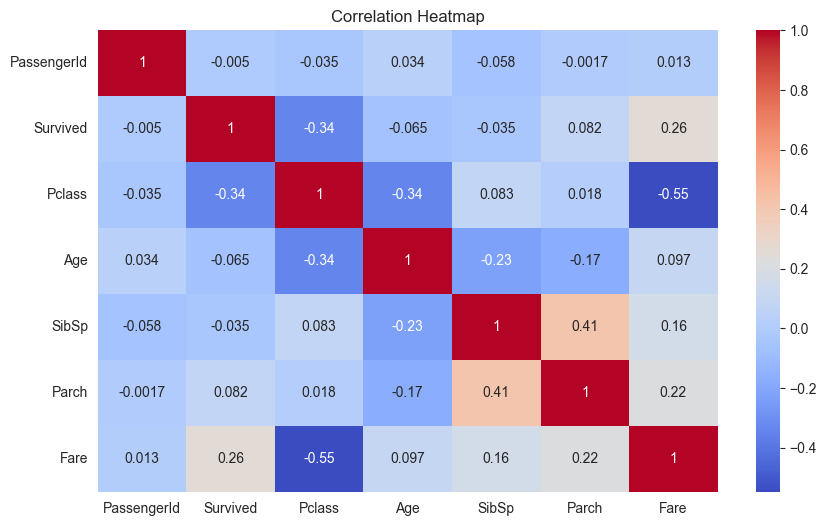

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Observations & Insights

Based on the exploratory data analysis, here are the key insights from the Titanic dataset:

- **Gender:** Female passengers had a much higher survival rate than males. Women and children were prioritized during evacuation.
- **Passenger Class:** First-class passengers had significantly higher survival chances compared to second and third class.
- **Age:** There was a tendency for younger passengers to survive more, though it wasn’t a strict rule.
- **Port of Embarkation (Embarked):** Passengers from Cherbourg (`C`) had slightly better survival outcomes than those from other ports.
- **Family (SibSp & Parch):** People with small families had slightly better survival, while those alone or with large families had lower survival.

These insights help understand the human and social dynamics behind the survival patterns during the Titanic disaster.

---

### Final Note

This cleaned and analyzed dataset is now ready for further use — such as training a machine learning model for survival prediction.


In [27]:
# Save the cleaned data for further use
df.to_csv('titanic_cleaned.csv', index=False)